# Currency Exchange Analytics

This project is about to analyse the currency datasets taken from the yahoo finance. Currency generally changes it's value against others with the passage of time. Furthermore, It also depends on the export and conversion rate of the country's currency. Currency of better values can make a country wealthier than others. The aim of this project is to analyze the EUR/USD dataset available and visulaize the trends and pattern present in it.  

## Datasets
The dataset used in this project is EUR/USD exchange rate data. This dataset has been taken from the yahoo finance. Currencies usually flactuates and sometimes increases and decreases with respect to each other. EUR is the currency normally used in europe while USD is the currency of United states. Both these currencies have a small difference in their values which is sometimes increase and decreases with time. The dataset contain values for each day till one year.

### Data Processing Software:
For data processing, we have some tools and softwares available which can process big data and can generate
some meaningful results. Different softwares have different application and features to process data. For the
puspose of this project we will use jupyter. We have a huge amount of data that needs to be processed, so we
use jupyter that will allow us to analyze results with their code at the same time. Both the codes and their results
can be shown at the same time.

### Methodlogy

#### Import Libray

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
from scipy.signal import savgol_filter
import statsmodels.formula.api as smf #R-like model specification\
from sklearn import linear_model 
from scipy.signal import savgol_filter
import statsmodels.formula.api as smf
import xarray


#### Read Dataset

In [3]:
path = r'D:\Freelancing\Python_Freelancing\US_EURO_Analytics'
df = pd.read_csv(path+'\\EURUSD_X.csv')


In [4]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-11-30,1.197074,1.200206,1.194415,1.197146,1.197146,0
1,2020-12-01,1.193773,1.205357,1.193599,1.193816,1.193816,0
2,2020-12-02,1.206986,1.210742,1.204079,1.207438,1.207438,0
3,2020-12-03,1.211343,1.217500,1.210243,1.211460,1.211460,0
4,2020-12-04,1.214535,1.217775,1.213371,1.214565,1.214565,0


#### Visualization

Text(0.5, 1.0, 'Opening of dollar vs Dates')

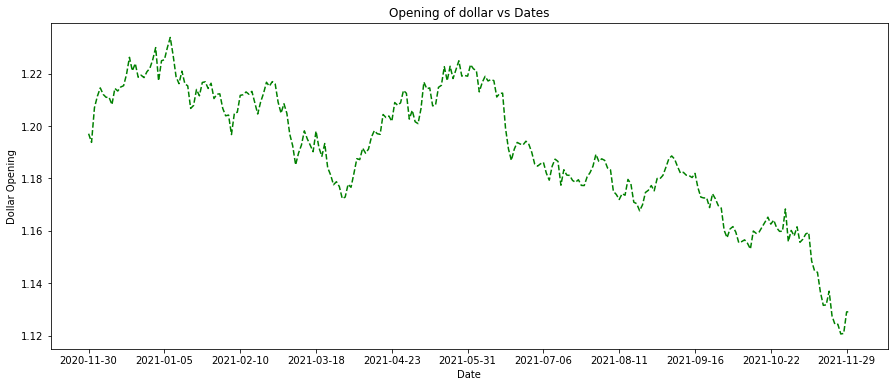

In [5]:
plt.figure(figsize=(15,6))
plt.plot( df['Date'],df['Open'], 'g--')
plt.xticks(df['Date'][0:263:26])
plt.xlabel("Date")
plt.ylabel("Dollar Opening")
plt.title("Opening of dollar vs Dates")

This figure shows the opening price of dollars against EURO from 2020 to 2021 at each day. It further illustrates that the price of USD is decreased with this one year of data. In the start their price was 1.19 which is decreased upto 1.12 at the end of November 2021. Although it shows some fluctuation in middle but overal it decreases. 

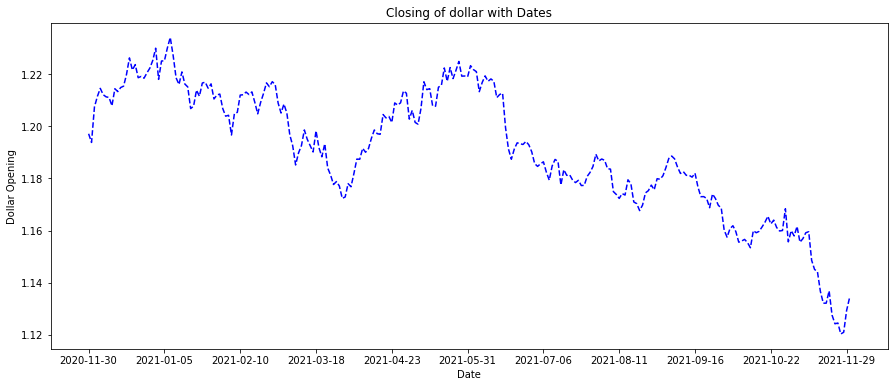

In [8]:
plt.figure(figsize=(15,6))
plt.plot( df['Date'],df['Close'], 'b--')
plt.xticks(df['Date'][0:263:26])

plt.xlabel("Date")
plt.ylabel("Dollar Opening")
plt.title("Closing of dollar with Dates")
plt.show()

This figure shows the Closing price of dollars against EURO from 2020 to 2021 at each day. It further illustrates that like opening price, here price of USD is also decreased in this one year of data. In the start their price was 1.192 which is decreased upto 1.123 at the end of November 2021. Although it shows some fluctuation in middle but overal it decreases.

#### Difference Between Opening and Closing

In [9]:
df['Close - Open'] = df['Close']- df['Open']

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Close - Open
0,2020-11-30,1.197074,1.200206,1.194415,1.197146,1.197146,0,0.000072
1,2020-12-01,1.193773,1.205357,1.193599,1.193816,1.193816,0,0.000043
2,2020-12-02,1.206986,1.210742,1.204079,1.207438,1.207438,0,0.000452
3,2020-12-03,1.211343,1.217500,1.210243,1.211460,1.211460,0,0.000117
4,2020-12-04,1.214535,1.217775,1.213371,1.214565,1.214565,0,0.000030
...,...,...,...,...,...,...,...,...
257,2021-11-24,1.124391,1.125454,1.118781,1.124493,1.124493,0,0.000102
258,2021-11-25,1.120699,1.123091,1.120398,1.120298,1.120298,0,-0.000401
259,2021-11-26,1.120900,1.132200,1.120800,1.120963,1.120963,0,0.000063
260,2021-11-29,1.129114,1.129801,1.125885,1.129318,1.129318,0,0.000204


Here a new column has been added in the dataframe. This column shows the difference of values between the closing and opening price. It can be seen that there are very small difference and this difference is positive. 

#### Visualize the difference between opening and closing 

At this point we have added a new column to the dataframe because we want to know the difference between closing and openig of currency each day. We want to know their range between the two values. 

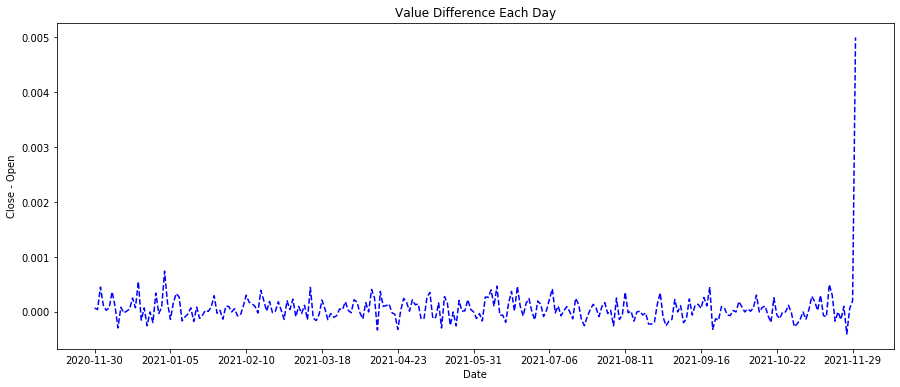

In [11]:
plt.figure(figsize=(15,6))
plt.plot( df['Date'],df['Close - Open'], 'b--')
plt.xticks(df['Date'][0:263:26])
plt.xlabel("Date")
plt.ylabel("Close - Open")
plt.title("Value Difference Each Day")
plt.show()

This figure depicts the difference of closing and opening against dates. This different is not showing any obvious increasing or decreasing trend through out the year but in the end it shows an outlier. In the end of November 2021, the values of this difference is about 0.005 which was 0.0004 in November 2020. 

### Predict Future Values of Currency

In [12]:
columnNames = ['Close', 'Open','High','Low','Adj Close']
regressionData = pd.DataFrame(columns = columnNames)

In [13]:
regressionData['Close'] = df['Close'].values
regressionData['Open'] = df['Open'].values
regressionData['High'] = df['High'].values
regressionData['Low'] = df['Low'].values
regressionData['Adj Close'] = df['Adj Close'].values


In [14]:
regressionData

,Close,Open,High,Low,Adj Close
0,1.197146,1.197074,1.200206,1.194415,1.197146
1,1.193816,1.193773,1.205357,1.193599,1.193816
2,1.207438,1.206986,1.210742,1.204079,1.207438
3,1.211460,1.211343,1.217500,1.210243,1.211460
4,1.214565,1.214535,1.217775,1.213371,1.214565
...,...,...,...,...,...
257,1.124493,1.124391,1.125454,1.118781,1.124493
258,1.120298,1.120699,1.123091,1.120398,1.120298
259,1.120963,1.120900,1.132200,1.120800,1.120963
260,1.129318,1.129114,1.129801,1.125885,1.129318


In [15]:
regressionDataTrain = regressionData[0:200]
regressionDataTest = regressionData[201:]


In [16]:
len(regressionDataTest)


61

In [17]:
m1 = str('Close ~ High+Low') 

In [22]:
train_m1_fit = smf.ols(m1,data= regressionDataTrain).fit()
print(train_m1_fit.summary())


                            OLS Regression Results                            
Dep. Variable:                  Close   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     7179.
Date:                Wed, 01 Dec 2021   Prob (F-statistic):          8.94e-185
Time:                        16:02:45   Log-Likelihood:                 967.84
No. Observations:                 200   AIC:                            -1930.
Df Residuals:                     197   BIC:                            -1920.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0091      0.010      0.881      0.3

In [19]:
train_m1_fit.fittedvalues


0      1.197457
1      1.200588
2      1.207617
3      1.214122
4      1.215340
         ...   
195    1.179614
196    1.182228
197    1.183137
198    1.185262
199    1.188702
Length: 200, dtype: float64

In [26]:
Predict = train_m1_fit.predict(regressionDataTest)


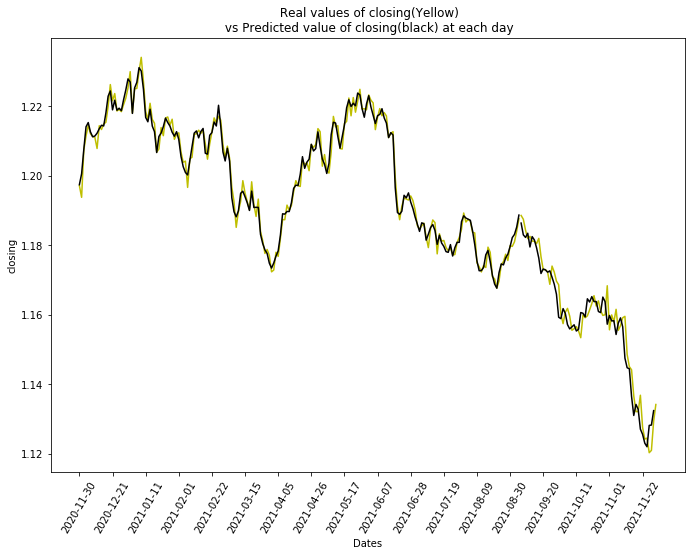

In [21]:
plt.figure(figsize = (25,8))
plt.subplot(1,2,1)
plt.plot( df['Date'][0:200],regressionData['Close'][0:200], 'y')
plt.plot( df['Date'][200:],regressionData['Close'][200:], 'y')
plt.xticks(df['Date'][0:262:15],rotation = 60)
plt.xlabel("dates")
plt.ylabel("Closing")

plt.plot( df['Date'][0:200],train_m1_fit.fittedvalues, 'k')
plt.plot( df['Date'][200:261],train_m1_fit.predict(regressionDataTest), 'k')
plt.xticks(df['Date'][0:262:15],rotation = 60)
plt.xlabel("Dates")
plt.ylabel("closing")
plt.title(" Real values of closing(Yellow)\n vs Predicted value of closing(black) at each day")
plt.show()

Above figure shows the closing actual and predicted value of the USD against EURO from november 2020 to november 2021. Here in this figure, yellow line represent the actuall values while the balck line represent the predicted values. In the start, the values shows some fluctuation till june 2021, but ther are a decreasing trend in it after that.  

In [23]:
m2 = str('High ~ Low+High') 

In [24]:
train_m2_fit = smf.ols(m2,data= regressionDataTrain).fit()



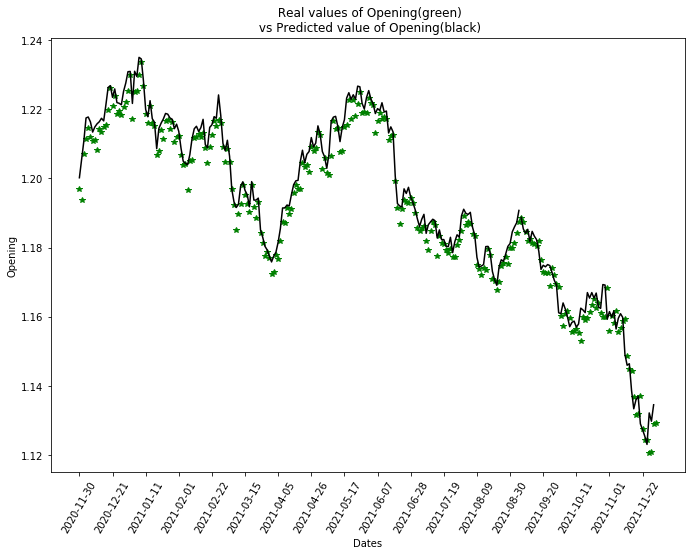

In [25]:
plt.figure(figsize = (25,8))
plt.subplot(1,2,1)
plt.plot( df['Date'][0:200],regressionData['Open'][0:200], 'g*')
plt.plot( df['Date'][200:],regressionData['Open'][200:], 'g*')
plt.xticks(df['Date'][0:262:15],rotation = 60)
plt.xlabel("dates")
plt.ylabel("Opening")

plt.plot( df['Date'][0:200],train_m2_fit.fittedvalues, 'k')
plt.plot( df['Date'][200:261],train_m2_fit.predict(regressionDataTest), 'k')
plt.xticks(df['Date'][0:262:15],rotation = 60)
plt.xlabel("Dates")
plt.ylabel("Opening")
plt.title(" Real values of Opening(green)\n vs Predicted value of Opening(black)")

plt.show()

Above figure shows the opening actual and predicted value of the USD against EURO from november 2020 to november 2021. Here in this figure, green line represent the actuall values while the balck line represent the predicted values. Like closing, here in the start, the values shows some fluctuation till june 2021, but ther are a decreasing trend in it after that. 